# CA-05 kNN based Movie Recommender Engine

### Question: Given a movies data set, what are the 5 most similar movies to a movie query?

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://github.com/ArinB/MSBA-CA-Data/raw/main/CA05/movies_recommendation_data.csv')
df

,Movie ID,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,58,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,8,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,46,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,62,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,97,Forrest Gump,8.8,0,1,0,0,0,0,0,0
5,98,21,6.8,0,1,0,0,1,0,1,0
6,31,Gifted,7.6,0,1,0,0,0,0,0,0
7,3,Travelling Salesman,5.9,0,1,0,0,0,1,0,0
8,51,Avatar,7.9,0,0,0,0,0,0,0,0
9,47,The Karate Kid,7.2,0,1,0,0,0,0,0,0


In [17]:
df.shape

(30, 10)

In [19]:
df.describe()

,Movie ID,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,48.133333,7.696667,0.233333,0.600000,0.100000,0.100000,0.133333,0.100000,0.100000
std,29.288969,0.666169,0.430183,0.498273,0.305129,0.305129,0.345746,0.305129,0.305129
min,1.000000,5.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.750000,7.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.500000,7.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.250000,8.175000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,8.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## EDA

In [21]:
#null values
df.isna().any()

Movie ID       False
Movie Name     False
IMDB Rating    False
Biography      False
Drama          False
Thriller       False
Comedy         False
Crime          False
Mystery        False
History        False
dtype: bool

In [23]:
#duplicate values
df.duplicated().sum()

0

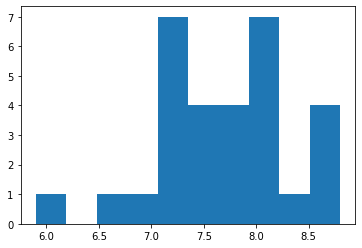

In [36]:
# visualize the distribution of a numeric column
plt.hist(df['IMDB Rating'])
plt.show()

In [27]:
#drop columns
data = df.drop(columns=["Movie ID", "Movie Name", "Label"])

## KNN Algorithm: Recommender System

In [33]:
from sklearn.neighbors import NearestNeighbors

# Define feature vector for "The Post"
the_post = [7.2, 1, 1, 0, 0, 0, 0, 1]

# Create a NearestNeighbors object and fit it to the data
knn = NearestNeighbors(n_neighbors=5, algorithm='auto', metric='minkowski')
knn.fit(data)

# Find the k nearest neighbors to the movie
distances, indices = knn.kneighbors([the_post])

# Print out the k most similar movies
print("Movies similar to The Post:")
for i in indices[0]:
    print(df.iloc[i]['Movie Name'])

Movies similar to The Post:
12 Years a Slave
Hacksaw Ridge
Queen of Katwe
The Wind Rises
A Beautiful Mind
